### ВЫВОДЫ 

Проблема продукта: Выручка стоит на месте. 

#### Вывод п.1: 

- В retention не учитываем недоступные заказы unavailable и отмененные canceled
- Месячный retention не выходит на плато
- Медианный retention 1-го месяца равен 0.0035 
- Когрта с самым высоким retention на 3-й месяц 2017-01


#### Вывод п.2:

- Нет плато - produc/market fit отсутсвует.
- Пользователи не находят добавочной ценности в продукте после первой покупки по сравнению с конкуретами. Следовательно для повторной покупки большиство пользователей используют привычный им метод покупки товаров из Бразилии. Нужно концетрироватся на добление этой добавочной ценности, чтобы преодолеть силу привычки клиента пользования продукта конкурента.

#### Вывод п.3:

5 основных метрик на которых нужно концентрироваться:

- Метрика, отражающая объем продаж: AOV - average order value
- Метрика, показывающая объем аудитории, которой продукт доставляет ценность - retention 
- Метрика, которая отражает заинтересованность новых клиентов в продутке - новые клиенты в месяц
- Метрика, которая отражает вовлеченность клиента в продолжение использования продукта - среднее время жизни клиента, расчитанная по когортам 
- Метрика, которая денежное выражение вовлеченности клиента - LTV - lifetime value

#### Вывод п.4:

Гипотеза 1: 
Если мы считаем, что мы таким образом избавимся от всех отмен, то Impact = 499
По шкале перевода Impact = 4. 

ICE_1 = 4 * 8 * 6 = 192

Гипотеза 2:
Предполагаем, что мы избавляемся от запозданий в доставке Impact = 26.7 c учетом конверсии в повторную покупку.
По шкале перевода Impact = 1. 

ICE_2 = 1 * 10 * 4 = 40 

Гипотеза 3: 
Impact гипотезы будет равнятся кол-ву выставленных счетов invoiced умноженных на конверсию в повторный заказ. Предполагаем, что все выставленные счета подтвердились.По шкале перевода Impact = 1.

ICE_3 = 1 * 5 * 9 = 45 

#### Вывод п.5
Метрики, на которые гипотеза должна повлиять

Выбранная гипотеза - это гипотеза 1, из-за наибольшого расчитанного ICE-score:
- Если исправим баг в системе процессинга заказов, то клиентам не придётся сталкиваться с проблемой отмены заказа, вследствие чего количество доставленных заказов увеличится. Считаем, что мы таким образом избавимся от всех отмен.


Целевая метрика на которую должна повлиять гипотеза - это

- Доля завершенных заказов

Прокси метрика на которую должна повлиять гипотеза - это

- Кол-во добавлений чего-то в корзину на одного пользователя

Guardrail метрика на которую должна повлиять гипотеза - это

- Доля отмененных заказов 

### Общий вывод по продукту: 

Продукт "дырявое ведро" и не находит своей целевой аудитории. Большинство пользователей используют продукт один раз, не находят в нем ценности для повторного использования. 

Рекомендуется стремиться найти целевую аудиторию и повысить PMF.

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns 
from operator import attrgetter
from matplotlib import pyplot as plt
from matplotlib import colors as mcolors

### Общая обработка данных

In [2]:
db_customers = pd.read_csv("olist_customers_dataset.csv")

In [3]:
db_customers.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [4]:
db_orders = pd.read_csv("olist_orders_dataset.csv")

In [5]:
db_orders.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00


In [6]:
db_orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [7]:
db_order_items = pd.read_csv("olist_order_items_dataset.csv")

In [8]:
db_order_items.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [9]:
db_orders.query("order_id == '00143d0f86d6fbd9f9b38ab440ac16f5'")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
36265,00143d0f86d6fbd9f9b38ab440ac16f5,2e45292979b9b2700ea09560eeb0f803,delivered,2017-10-16 15:29:43,2017-10-16 16:07:52,2017-10-16 23:04:43,2017-10-27 18:43:56,2017-11-06 00:00:00


In [10]:
db_order_items.query("order_id == '00143d0f86d6fbd9f9b38ab440ac16f5'")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
32,00143d0f86d6fbd9f9b38ab440ac16f5,1,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.1
33,00143d0f86d6fbd9f9b38ab440ac16f5,2,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.1
34,00143d0f86d6fbd9f9b38ab440ac16f5,3,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.1


In [11]:
db_customers.query("customer_id == '2e45292979b9b2700ea09560eeb0f803'")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
58260,2e45292979b9b2700ea09560eeb0f803,bb8a37225e0279ac8a274c9765617eaf,74663,goiania,GO


In [12]:
db_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [13]:
db_orders.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [14]:
db_orders['order_purchase_timestamp']\
    = pd.to_datetime(db_orders['order_purchase_timestamp'])
#format = "%Y-%m-%d %H:%M:%S"

In [15]:
db_orders['order_approved_at']\
    = pd.to_datetime(db_orders['order_approved_at'])

In [16]:
db_orders['order_delivered_carrier_date']\
    = pd.to_datetime(db_orders['order_delivered_carrier_date'])

In [17]:
db_orders['order_delivered_customer_date']\
    = pd.to_datetime(db_orders['order_delivered_customer_date'])

In [18]:
db_orders['order_estimated_delivery_date']\
    = pd.to_datetime(db_orders['order_estimated_delivery_date'])

In [19]:
db_merge = pd.merge(db_orders, db_customers, on = 'customer_id')

In [20]:
db_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 99440
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
 8   customer_unique_id             99441 non-null  object        
 9   customer_zip_code_prefix       99441 non-null  int64         
 10  customer_city                  99441 non-null  object        
 11  customer_state 

In [21]:
db_merge.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
dtype: int64

In [22]:
df = db_merge.groupby('customer_unique_id', as_index=False).agg({"order_id":"count"})

#### Находим типы заказов, которые не будем учитывать в когортном анализе 

In [23]:
db_merge.groupby('order_status', as_index=False).agg({'order_id':'count'})

,order_status,order_id
0,approved,2
1,canceled,625
2,created,5
3,delivered,96478
4,invoiced,314
5,processing,301
6,shipped,1107
7,unavailable,609


### Когортный анализ 

In [24]:
data_copy = db_merge.copy()

In [25]:
data_copy = data_copy.query("order_status != 'unavailable' and order_status != 'canceled'")

In [26]:
data_copy.groupby('order_status').agg(count = ('order_id','count'))

,count
order_status,
approved,2
created,5
delivered,96478
invoiced,314
processing,301
shipped,1107


In [27]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98207 entries, 0 to 99440
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       98207 non-null  object        
 1   customer_id                    98207 non-null  object        
 2   order_status                   98207 non-null  object        
 3   order_purchase_timestamp       98207 non-null  datetime64[ns]
 4   order_approved_at              98188 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97583 non-null  datetime64[ns]
 6   order_delivered_customer_date  96470 non-null  datetime64[ns]
 7   order_estimated_delivery_date  98207 non-null  datetime64[ns]
 8   customer_unique_id             98207 non-null  object        
 9   customer_zip_code_prefix       98207 non-null  int64         
 10  customer_city                  98207 non-null  object        
 11  customer_state 

In [28]:
data_copy = data_copy[['order_id','customer_id','customer_unique_id',\
                      'order_purchase_timestamp']]

In [29]:
data_copy.isna().sum()

order_id                    0
customer_id                 0
customer_unique_id          0
order_purchase_timestamp    0
dtype: int64

In [31]:
# Извлекаем месяц и день заказа
data_copy['order_period'] = data_copy['order_purchase_timestamp'].dt.to_period('M')
data_copy['order_period_day'] = data_copy['order_purchase_timestamp'].dt.to_period('D')

In [32]:
data_copy

,order_id,customer_id,customer_unique_id,order_purchase_timestamp,order_period,order_period_day
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33,2017-10,2017-10-02
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,af07308b275d755c9edb36a90c618231,2018-07-24 20:41:37,2018-07,2018-07-24
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,3a653a41f6f9fc3d2a113cf8398680e8,2018-08-08 08:38:49,2018-08,2018-08-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,7c142cf63193a1473d2e66489a9ae977,2017-11-18 19:28:06,2017-11,2017-11-18
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,72632f0f9dd73dfee390c9b22eb56dd6,2018-02-13 21:18:39,2018-02,2018-02-13
...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,6359f309b166b0196dbf7ad2ac62bb5a,2017-03-09 09:54:05,2017-03,2017-03-09
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,da62f9e57a76d978d02ab5362c509660,2018-02-06 12:58:58,2018-02,2018-02-06
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,737520a9aad80b3fbbdad19b66b37b30,2017-08-27 14:46:43,2017-08,2017-08-27
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,5097a5312c8b157bb7be58ae360ef43c,2018-01-08 21:28:27,2018-01,2018-01-08


In [33]:
# Присваиваем когорты на основе даты первого действия для каждого пользователя
data_copy['cohort'] = data_copy.groupby('customer_unique_id')['order_purchase_timestamp'].transform('min').dt.to_period('M')
data_copy['cohort_day'] = data_copy.groupby('customer_unique_id')['order_purchase_timestamp'].transform('min').dt.to_period('D')

In [34]:
data_copy

,order_id,customer_id,customer_unique_id,order_purchase_timestamp,order_period,order_period_day,cohort,cohort_day
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33,2017-10,2017-10-02,2017-09,2017-09-04
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,af07308b275d755c9edb36a90c618231,2018-07-24 20:41:37,2018-07,2018-07-24,2018-07,2018-07-24
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,3a653a41f6f9fc3d2a113cf8398680e8,2018-08-08 08:38:49,2018-08,2018-08-08,2018-08,2018-08-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,7c142cf63193a1473d2e66489a9ae977,2017-11-18 19:28:06,2017-11,2017-11-18,2017-11,2017-11-18
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,72632f0f9dd73dfee390c9b22eb56dd6,2018-02-13 21:18:39,2018-02,2018-02-13,2018-02,2018-02-13
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,6359f309b166b0196dbf7ad2ac62bb5a,2017-03-09 09:54:05,2017-03,2017-03-09,2017-03,2017-03-09
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,da62f9e57a76d978d02ab5362c509660,2018-02-06 12:58:58,2018-02,2018-02-06,2018-02,2018-02-06
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,737520a9aad80b3fbbdad19b66b37b30,2017-08-27 14:46:43,2017-08,2017-08-27,2017-08,2017-08-27
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,5097a5312c8b157bb7be58ae360ef43c,2018-01-08 21:28:27,2018-01,2018-01-08,2018-01,2018-01-08


In [35]:
# Рассчитываем номер периода в днях (месячные периоды, деля на 30)
data_copy['period_number_month'] = np.floor((data_copy.order_period_day - data_copy.cohort_day).apply(attrgetter('n')) / 30)

In [36]:
data_copy

,order_id,customer_id,customer_unique_id,order_purchase_timestamp,order_period,order_period_day,cohort,cohort_day,period_number_month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33,2017-10,2017-10-02,2017-09,2017-09-04,0.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,af07308b275d755c9edb36a90c618231,2018-07-24 20:41:37,2018-07,2018-07-24,2018-07,2018-07-24,0.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,3a653a41f6f9fc3d2a113cf8398680e8,2018-08-08 08:38:49,2018-08,2018-08-08,2018-08,2018-08-08,0.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,7c142cf63193a1473d2e66489a9ae977,2017-11-18 19:28:06,2017-11,2017-11-18,2017-11,2017-11-18,0.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,72632f0f9dd73dfee390c9b22eb56dd6,2018-02-13 21:18:39,2018-02,2018-02-13,2018-02,2018-02-13,0.0
...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,6359f309b166b0196dbf7ad2ac62bb5a,2017-03-09 09:54:05,2017-03,2017-03-09,2017-03,2017-03-09,0.0
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,da62f9e57a76d978d02ab5362c509660,2018-02-06 12:58:58,2018-02,2018-02-06,2018-02,2018-02-06,0.0
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,737520a9aad80b3fbbdad19b66b37b30,2017-08-27 14:46:43,2017-08,2017-08-27,2017-08,2017-08-27,0.0
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,5097a5312c8b157bb7be58ae360ef43c,2018-01-08 21:28:27,2018-01,2018-01-08,2018-01,2018-01-08,0.0


In [37]:
# Агрегируем данные по когортам и рассчитанному номеру периода (в месяцах)
df_cohort = data_copy.groupby(['cohort', 'period_number_month']).agg(n_customers=('customer_unique_id', 'nunique')).reset_index()

In [38]:
df_cohort

,cohort,period_number_month,n_customers
0,2016-09,0.0,2
1,2016-10,0.0,290
2,2016-10,6.0,1
3,2016-10,9.0,1
4,2016-10,11.0,1
...,...,...,...
210,2018-06,1.0,22
211,2018-06,2.0,6
212,2018-07,0.0,6016
213,2018-07,1.0,6


In [39]:
# Создаем сводную таблицу для когортного анализа
cohort_pivot = df_cohort.pivot_table(index='cohort', columns='period_number_month', values='n_customers')

In [40]:
cohort_pivot

period_number_month,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,11.0,12.0,13.0,14.0,15.0,16.0,17.0,19.0,20.0,21.0
cohort,,,,,,,,,,,,,,,,,,,,,
2016-09,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10,290.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,...,1.0,NaN,1.0,NaN,1.0,NaN,1.0,2.0,1.0,1.0
2016-12,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,752.0,2.0,NaN,4.0,1.0,1.0,2.0,2.0,NaN,NaN,...,4.0,3.0,2.0,NaN,2.0,2.0,2.0,1.0,NaN,NaN
2017-02,1690.0,3.0,3.0,6.0,4.0,2.0,4.0,1.0,2.0,4.0,...,6.0,1.0,3.0,2.0,1.0,2.0,4.0,NaN,NaN,NaN
2017-03,2571.0,7.0,13.0,11.0,3.0,2.0,9.0,4.0,7.0,6.0,...,4.0,5.0,3.0,7.0,2.0,3.0,3.0,NaN,NaN,NaN
2017-04,2325.0,8.0,6.0,1.0,7.0,8.0,6.0,10.0,5.0,6.0,...,4.0,NaN,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN
2017-05,3541.0,15.0,15.0,12.0,13.0,12.0,12.0,4.0,10.0,9.0,...,11.0,7.0,4.0,8.0,5.0,NaN,NaN,NaN,NaN,NaN
2017-06,3102.0,12.0,14.0,11.0,4.0,16.0,9.0,6.0,4.0,11.0,...,8.0,2.0,8.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
# Рассчитываем размеры когорт (первый столбец сводной таблицы)
cohort_size = cohort_pivot.iloc[:, 0]

In [42]:
# Вычисляем коэффициенты удержания, деля на размер когорты
retention_matrix = cohort_pivot.divide(cohort_size, axis=0)

In [43]:
retention_matrix

period_number_month,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,11.0,12.0,13.0,14.0,15.0,16.0,17.0,19.0,20.0,21.0
cohort,,,,,,,,,,,,,,,,,,,,,
2016-09,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10,1.0,NaN,NaN,NaN,NaN,NaN,0.003448,NaN,NaN,0.003448,...,0.003448,NaN,0.003448,NaN,0.003448,NaN,0.003448,0.006897,0.003448,0.003448
2016-12,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,1.0,0.002660,NaN,0.005319,0.001330,0.001330,0.002660,0.002660,NaN,NaN,...,0.005319,0.003989,0.002660,NaN,0.002660,0.002660,0.002660,0.001330,NaN,NaN
2017-02,1.0,0.001775,0.001775,0.003550,0.002367,0.001183,0.002367,0.000592,0.001183,0.002367,...,0.003550,0.000592,0.001775,0.001183,0.000592,0.001183,0.002367,NaN,NaN,NaN
2017-03,1.0,0.002723,0.005056,0.004278,0.001167,0.000778,0.003501,0.001556,0.002723,0.002334,...,0.001556,0.001945,0.001167,0.002723,0.000778,0.001167,0.001167,NaN,NaN,NaN
2017-04,1.0,0.003441,0.002581,0.000430,0.003011,0.003441,0.002581,0.004301,0.002151,0.002581,...,0.001720,NaN,0.000860,0.000860,0.000860,0.000860,NaN,NaN,NaN,NaN
2017-05,1.0,0.004236,0.004236,0.003389,0.003671,0.003389,0.003389,0.001130,0.002824,0.002542,...,0.003106,0.001977,0.001130,0.002259,0.001412,NaN,NaN,NaN,NaN,NaN
2017-06,1.0,0.003868,0.004513,0.003546,0.001289,0.005158,0.002901,0.001934,0.001289,0.003546,...,0.002579,0.000645,0.002579,0.000967,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
n_row = retention_matrix.shape[0]
n_col = retention_matrix.shape[1]

In [46]:
retention_matrix.iloc[20, :1]

period_number_month
0.0    1.0
Name: 2018-06, dtype: float64

In [47]:
for i in range(n_row-2):
    n_col = n_col-1
   

In [101]:
n_col = 21
for i in range(n_row-2):
    retention_matrix.iloc[i, :n_col].fillna(0, inplace=True)
    n_col = n_col-1


In [102]:
retention_matrix

period_number_month,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,11.0,12.0,13.0,14.0,15.0,16.0,17.0,19.0,20.0,21.0
cohort,,,,,,,,,,,,,,,,,,,,,
2016-09,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2016-10,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.003448,0.000000,0.000000,0.003448,...,0.003448,0.000000,0.003448,0.000000,0.003448,0.000000,0.003448,0.006897,0.003448,0.003448
2016-12,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
2017-01,1.0,0.002660,0.000000,0.005319,0.001330,0.001330,0.002660,0.002660,0.000000,0.000000,...,0.005319,0.003989,0.002660,0.000000,0.002660,0.002660,0.002660,0.001330,NaN,NaN
2017-02,1.0,0.001775,0.001775,0.003550,0.002367,0.001183,0.002367,0.000592,0.001183,0.002367,...,0.003550,0.000592,0.001775,0.001183,0.000592,0.001183,0.002367,NaN,NaN,NaN
2017-03,1.0,0.002723,0.005056,0.004278,0.001167,0.000778,0.003501,0.001556,0.002723,0.002334,...,0.001556,0.001945,0.001167,0.002723,0.000778,0.001167,0.001167,NaN,NaN,NaN
2017-04,1.0,0.003441,0.002581,0.000430,0.003011,0.003441,0.002581,0.004301,0.002151,0.002581,...,0.001720,0.000000,0.000860,0.000860,0.000860,0.000860,NaN,NaN,NaN,NaN
2017-05,1.0,0.004236,0.004236,0.003389,0.003671,0.003389,0.003389,0.001130,0.002824,0.002542,...,0.003106,0.001977,0.001130,0.002259,0.001412,NaN,NaN,NaN,NaN,NaN
2017-06,1.0,0.003868,0.004513,0.003546,0.001289,0.005158,0.002901,0.001934,0.001289,0.003546,...,0.002579,0.000645,0.002579,0.000967,NaN,NaN,NaN,NaN,NaN,NaN


### Месячный retention

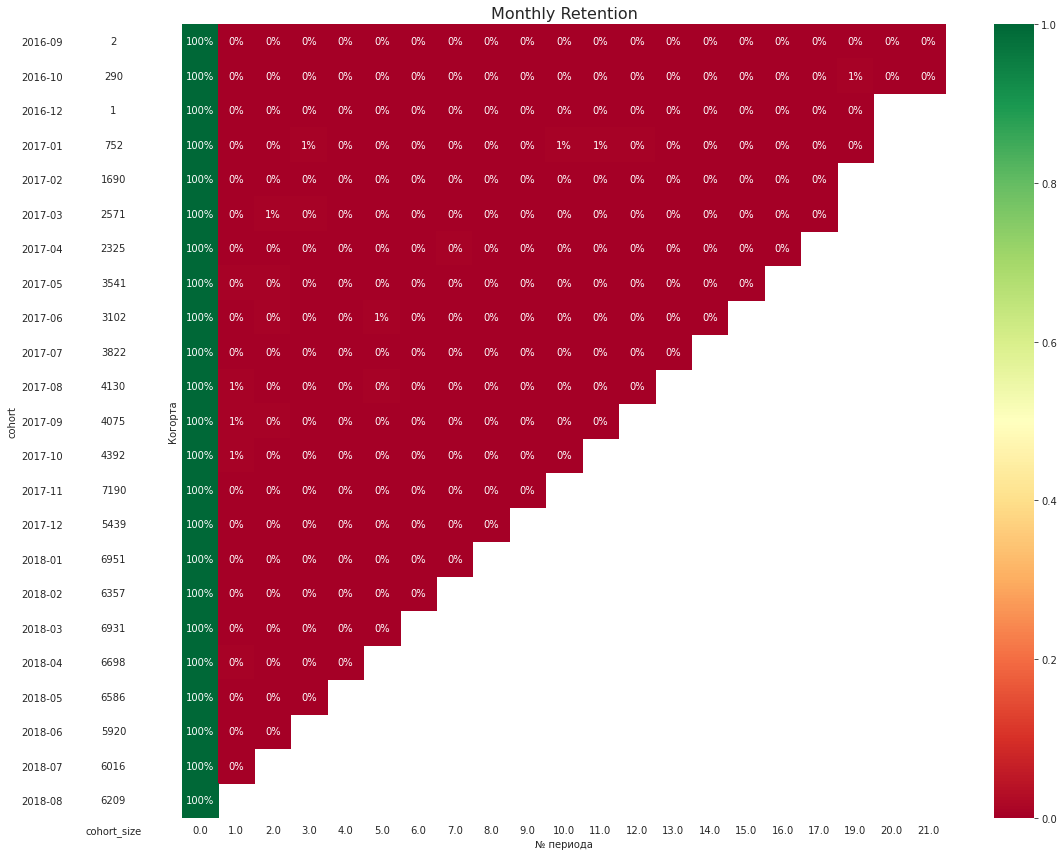

In [50]:
# Строим тепловую карту когортного анализа
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(16, 12), sharey=True, gridspec_kw={'width_ratios': [1, 11]})

    # Тепловая карта для коэффициентов удержания
    sns.heatmap(retention_matrix,
                mask=retention_matrix.isnull(),
                annot=True,
                fmt='.0%',
                cmap='RdYlGn',
                ax=ax[1])
    ax[1].set_title('Monthly Retention', fontsize=16)
    ax[1].set(xlabel='№ периода', ylabel='Когорта')

    # Тепловая карта для размеров когорт
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df,
                annot=True,
                cbar=False,
                fmt='g',
                cmap=white_cmap,
                ax=ax[0])

    fig.tight_layout()
    plt.show()

### Расчет медианы retention 1-го месяца

In [51]:
retention_matrix[1].median()

0.0035294595239182616

### Когорта с самым высоким месячным retention за 3-й месяц

In [52]:
retention_matrix[3].idxmax()

Period('2017-01', 'M')

### Cуществует ли product/market fit у маркетплейса

In [53]:
df_cohort

,cohort,period_number_month,n_customers
0,2016-09,0.0,2
1,2016-10,0.0,290
2,2016-10,6.0,1
3,2016-10,9.0,1
4,2016-10,11.0,1
...,...,...,...
210,2018-06,1.0,22
211,2018-06,2.0,6
212,2018-07,0.0,6016
213,2018-07,1.0,6


In [54]:
plt.rcParams.update({'font.size': 30, 'lines.linewidth': 5})

In [55]:
df = df_cohort.groupby("period_number_month", as_index=False).\
        agg({"n_customers":"sum"})

In [56]:
df

,period_number_month,n_customers
0,0.0,94990
1,1.0,327
2,2.0,226
3,3.0,187
4,4.0,157
5,5.0,134
6,6.0,122
7,7.0,94
8,8.0,76
9,9.0,74


Text(0, 0.5, 'retention')

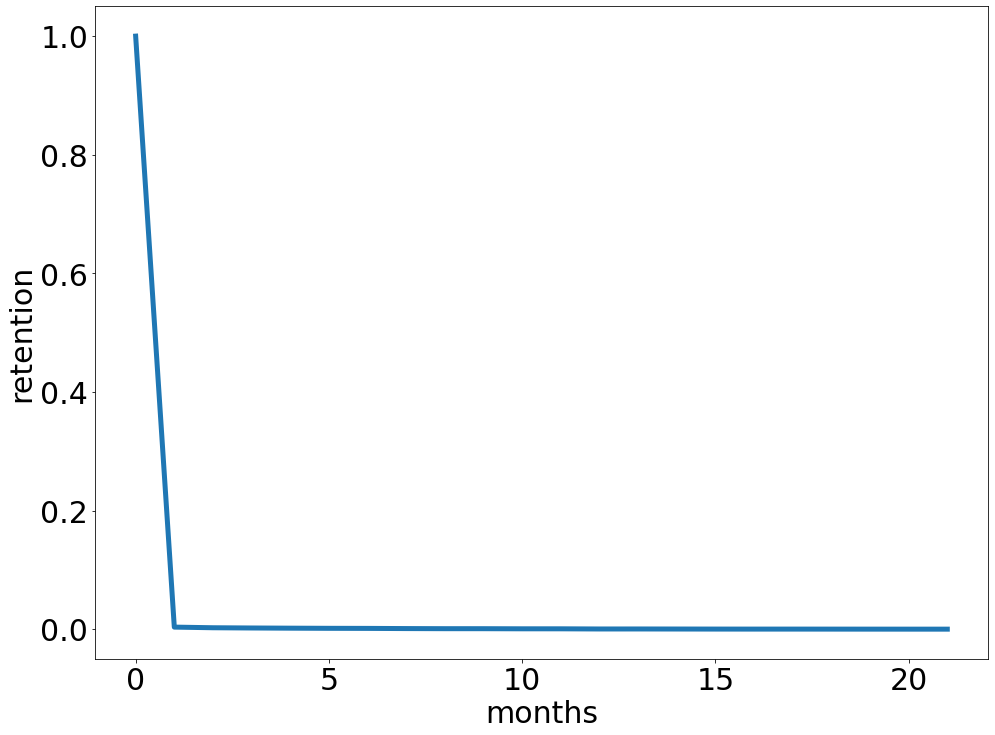

In [57]:
fig, ax = plt.subplots(1, 1, figsize = (16, 12))
ax.plot(df.period_number_month, df.n_customers/df.n_customers.iloc[0])
ax.set_xlabel('months')
ax.set_ylabel('retention')

Нет плато - produc/market fit отсутсвует. Начинать маштабировать нельзя, продукт "дырявое ведро". Пользователи не находят добавочной ценности в продукте после первой покупки по сравнению с конкуретами. Следовательно для повторной покупки большиство пользователей используют привычный им метод покупки товаров из Бразилии.

Также возможно, что продукт не решает поставленную задачу, хотя из данных не видно много отмененных или отсуствующих заказов

Концетрироваться нужно на конверсии в повторную покупку.

### 5 основных метрик на которых нужно концентрироваться


In [58]:
db_merge.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


### Объем продаж

In [59]:
db_merge.groupby("order_status", as_index=False).agg(count = ("order_id", "count"))

,order_status,count
0,approved,2
1,canceled,625
2,created,5
3,delivered,96478
4,invoiced,314
5,processing,301
6,shipped,1107
7,unavailable,609


Расчитаем AOV - average order value за месяц 

In [60]:
data_v = db_merge.query("order_status != 'unavailable' and order_status != 'canceled'")

In [61]:
data_v.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
customer_unique_id                       object
customer_zip_code_prefix                  int64
customer_city                            object
customer_state                           object
dtype: object

In [62]:
data_v = data_v.merge(db_order_items, on = "order_id")

In [63]:
data_v.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72


In [64]:
data_v.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date      721
order_delivered_customer_date    1912
order_estimated_delivery_date       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
dtype: int64

In [65]:
data_v.dropna(subset=["order_approved_at"], inplace=True)

In [66]:
data_v["order_approved_at"] = data_v["order_approved_at"].dt.to_period('M')

In [67]:
data_v=data_v.groupby(["order_approved_at"], as_index=False)\
      .agg(orders_num = ("order_id", "count"), revenue = ("price", "sum"))

In [68]:
data_v = data_v.assign(AOV = data_v.revenue/data_v.orders_num)

In [69]:
# data_v.drop("ARPU", axis=1, inplace=True)

In [70]:
data_v

,order_approved_at,orders_num,revenue,AOV
0,2016-09,3,134.97,44.990000
1,2016-10,344,44580.19,129.593576
2,2016-12,1,10.90,10.900000
3,2017-01,906,114646.11,126.540960
4,2017-02,1916,245097.41,127.921404
5,2017-03,2997,364608.58,121.657851
6,2017-04,2632,351581.17,133.579472
7,2017-05,4101,504527.15,123.025396
8,2017-06,3588,433858.69,120.919367
9,2017-07,4438,487021.88,109.739045


Text(0, 0.5, 'AOV')

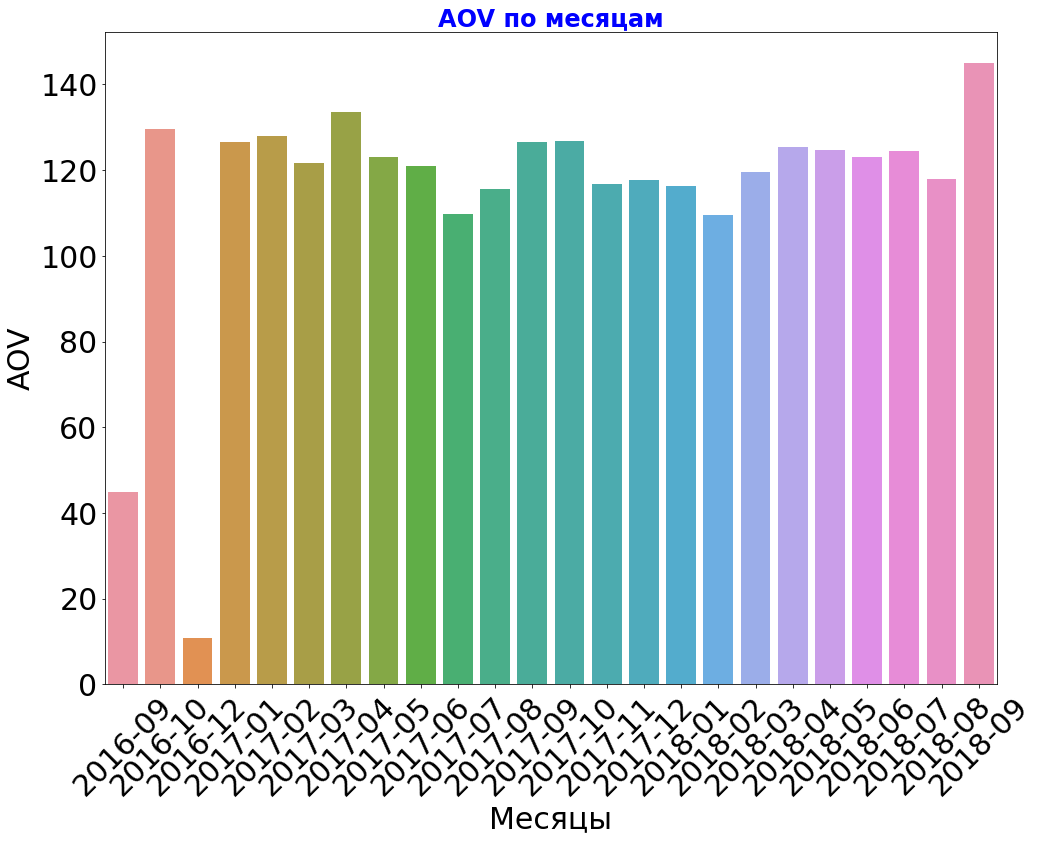

In [71]:
fig, ax = plt.subplots(1, 1, figsize = (16, 12))
sns.barplot(data = data_v, x = "order_approved_at", y = "AOV")
plt.xticks(rotation=45)
plt.title('AOV по месяцам', fontsize=24, color='blue', fontweight='bold')
plt.xlabel('Месяцы')
plt.ylabel('AOV')

Объем продаж не растет 


### Объем аудитории, которой продукт доставляет ценность.

Возьмем в качестве оценки метрику retention 

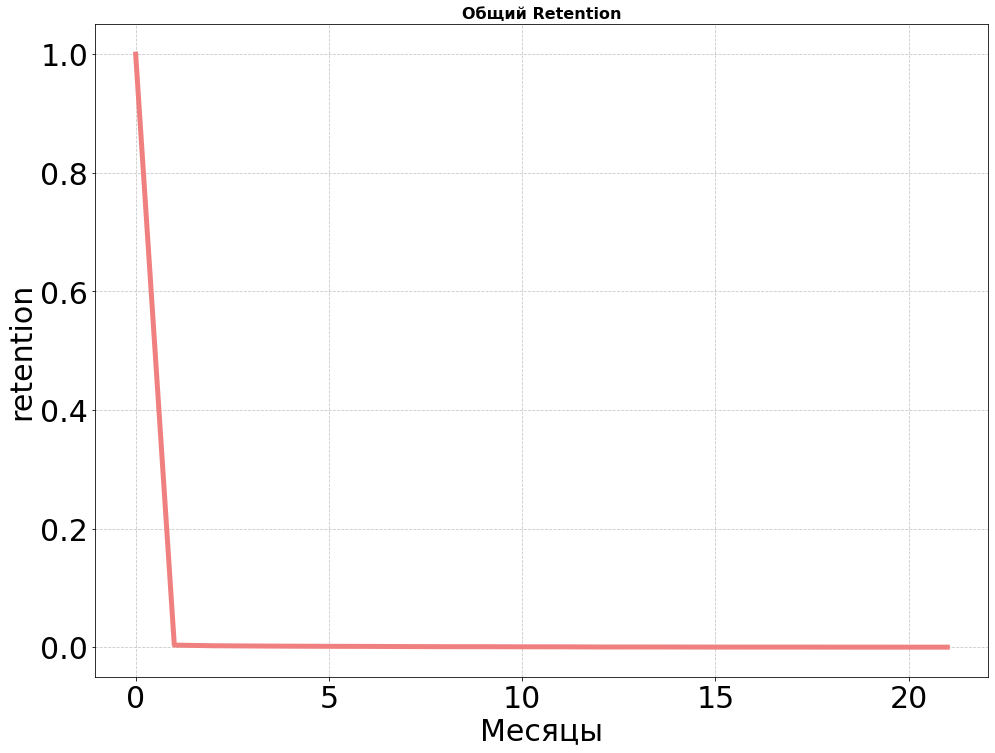

In [72]:
fig, ax = plt.subplots(1, 1, figsize = (16, 12))
ax.plot(df.period_number_month, df.n_customers/df.n_customers.iloc[0], color = 'lightcoral')
ax.set_title('Общий Retention', fontsize=16, fontweight='bold')
ax.set_xlabel('Месяцы')
ax.set_ylabel('retention')
ax.grid(True, linestyle='--', alpha=0.7)

По retention видно, что в продукте никто не задерживается более одного месяца

### Заинтересованность новых клиентов в продукте

Расчитаем сколько новых пользователей добавили что-то в корзину в месяц 


In [73]:
new_clients_s = cohort_pivot[0].to_frame().reset_index()

In [74]:
new_clients_s.rename(columns = {0:"new_clients_count"}, inplace=True)

In [75]:
new_clients_s

,cohort,new_clients_count
0,2016-09,2.0
1,2016-10,290.0
2,2016-12,1.0
3,2017-01,752.0
4,2017-02,1690.0
5,2017-03,2571.0
6,2017-04,2325.0
7,2017-05,3541.0
8,2017-06,3102.0
9,2017-07,3822.0


Text(0, 0.5, 'Кол-во новых клиентов')

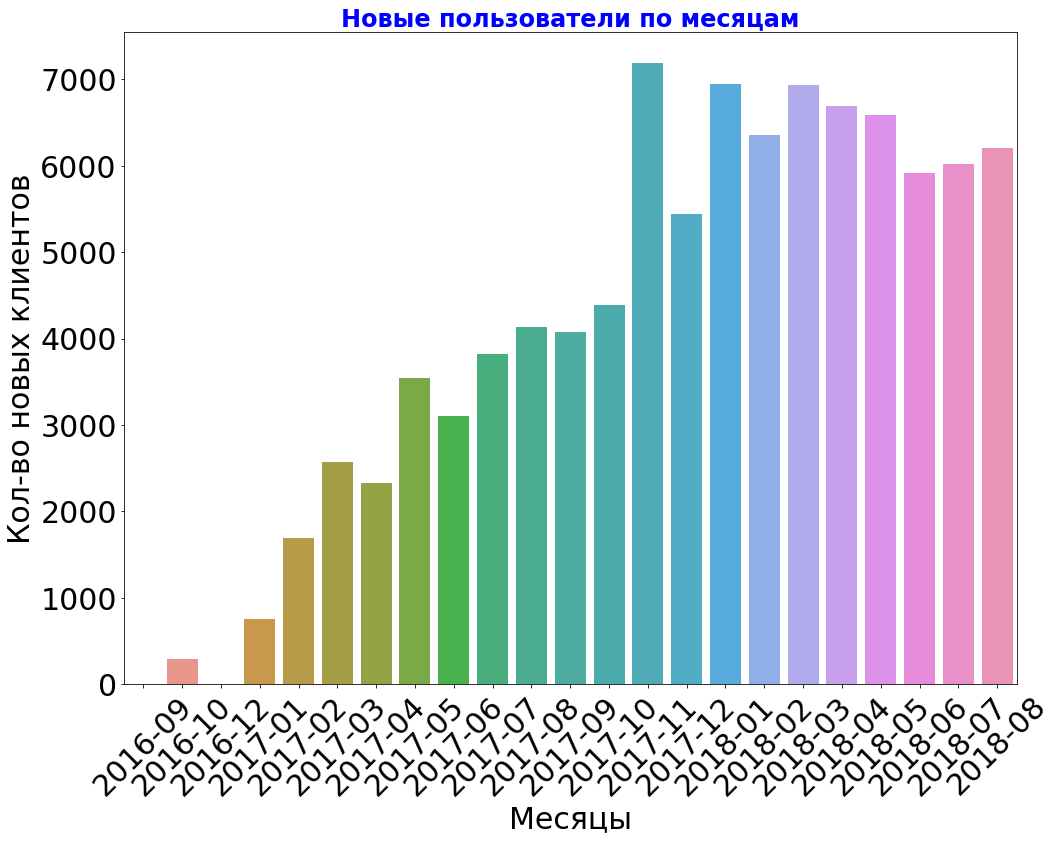

In [76]:
fig, ax = plt.subplots(1, 1, figsize = (16, 12))
sns.barplot(data = new_clients_s, x = "cohort",y = "new_clients_count" )
plt.xticks(rotation=45)
plt.title('Новые пользователи по месяцам', fontsize=24, color='blue', fontweight='bold')
plt.xlabel('Месяцы')
plt.ylabel('Кол-во новых клиентов')


### Вовлеченность в продолжение использования продукта

Посчитаем среднию длину жизни клиента

In [77]:
avg_retention = cohort_pivot.sum(axis=1)/cohort_pivot.iloc[:,0]

In [78]:
avg_retention = avg_retention.to_frame().reset_index()

In [79]:
avg_retention

,cohort,0
0,2016-09,1.000000
1,2016-10,1.034483
2,2016-12,1.000000
3,2017-01,1.042553
4,2017-02,1.028994
5,2017-03,1.036951
6,2017-04,1.030538
7,2017-05,1.040949
8,2017-06,1.037073
9,2017-07,1.030351


Text(0, 0.5, 'Средняя длина жизни, мес')

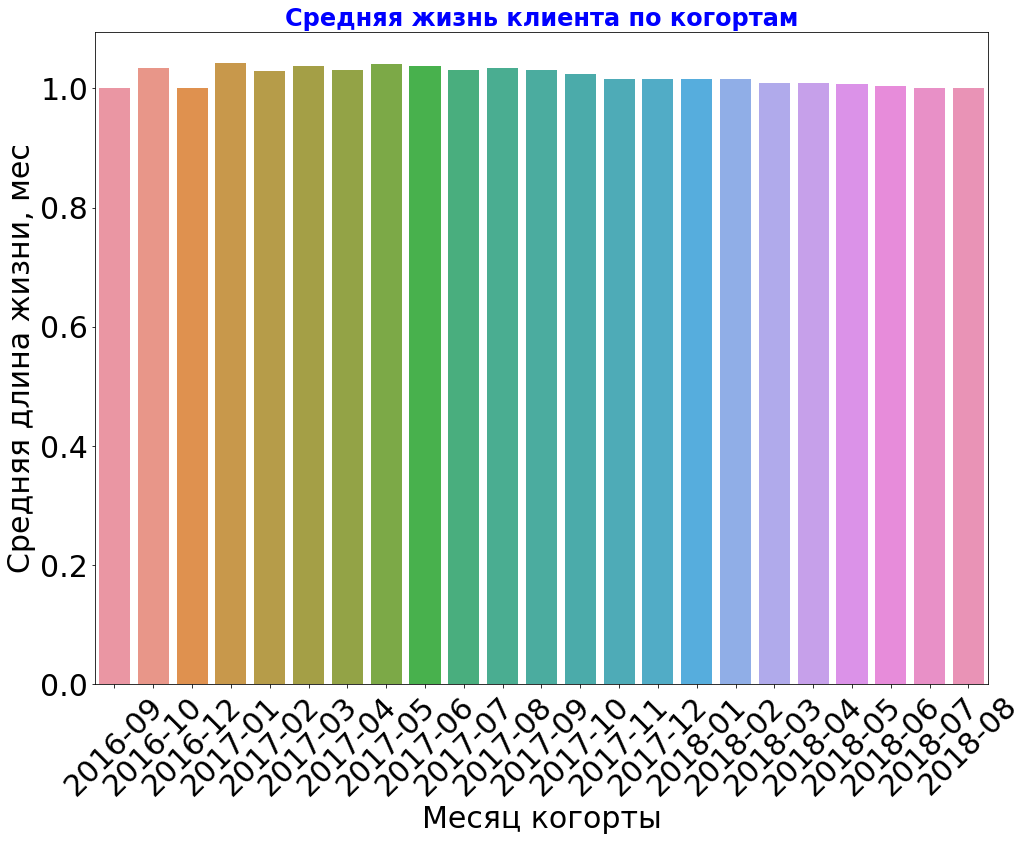

In [80]:
fig, ax = plt.subplots(1, 1, figsize = (16, 12))
sns.barplot(data = avg_retention, x = "cohort",y = 0 )
plt.xticks(rotation=45)
plt.title('Средняя жизнь клиента по когортам', fontsize=24, color='blue', fontweight='bold')
plt.xlabel('Месяц когорты')
plt.ylabel('Средняя длина жизни, мес')

###  Денежное выражение вовлеченности клиента

Посчитаем LTV - пожизненную ценность клиента, без учета затрат на одного клиента или предполагаем, что затраты на одного клиента равны 0

Накопленная выручка 
Формала из лекции гласит что - (сумма клиентов из верхней когорты) * (выручку с одного клиента)/(всех новых клиентов)

(выручку с одного клиента) - или средняя длина жизни * ARPU 

Средняя жизнь клиента равная 1 месяцу

AOV = ARPU в данном случае

In [81]:
data_v = data_v.assign(LTV = data_v.AOV*avg_retention[0])

In [82]:
data_v

,order_approved_at,orders_num,revenue,AOV,LTV
0,2016-09,3,134.97,44.990000,44.990000
1,2016-10,344,44580.19,129.593576,134.062320
2,2016-12,1,10.90,10.900000,10.900000
3,2017-01,906,114646.11,126.540960,131.925682
4,2017-02,1916,245097.41,127.921404,131.630368
5,2017-03,2997,364608.58,121.657851,126.153182
6,2017-04,2632,351581.17,133.579472,137.658673
7,2017-05,4101,504527.15,123.025396,128.063149
8,2017-06,3588,433858.69,120.919367,125.402194
9,2017-07,4438,487021.88,109.739045,113.069691


Text(0, 0.5, 'LTV')

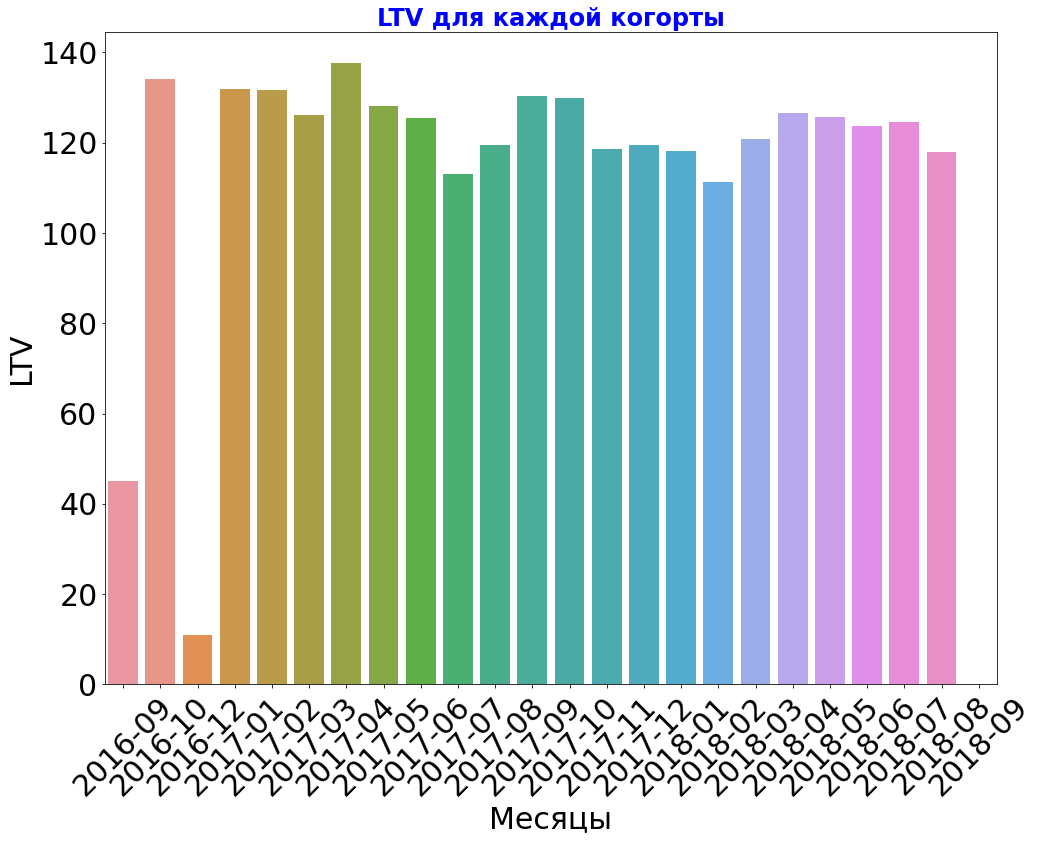

In [83]:
fig, ax = plt.subplots(1, 1, figsize = (16, 12))
sns.barplot(data = data_v, x = "order_approved_at", y = "LTV")
plt.xticks(rotation=45)
plt.title('LTV для каждой когорты', fontsize=24, color='blue', fontweight='bold')
plt.xlabel('Месяцы')
plt.ylabel('LTV')

### Выбрать одну из 3 основных гипотез с помощью фреймворка ICE.

In [84]:
retention_matrix

period_number_month,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,11.0,12.0,13.0,14.0,15.0,16.0,17.0,19.0,20.0,21.0
cohort,,,,,,,,,,,,,,,,,,,,,
2016-09,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2016-10,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.003448,0.000000,0.000000,0.003448,...,0.003448,0.000000,0.003448,0.000000,0.003448,0.000000,0.003448,0.006897,0.003448,0.003448
2016-12,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
2017-01,1.0,0.002660,0.000000,0.005319,0.001330,0.001330,0.002660,0.002660,0.000000,0.000000,...,0.005319,0.003989,0.002660,0.000000,0.002660,0.002660,0.002660,0.001330,NaN,NaN
2017-02,1.0,0.001775,0.001775,0.003550,0.002367,0.001183,0.002367,0.000592,0.001183,0.002367,...,0.003550,0.000592,0.001775,0.001183,0.000592,0.001183,0.002367,NaN,NaN,NaN
2017-03,1.0,0.002723,0.005056,0.004278,0.001167,0.000778,0.003501,0.001556,0.002723,0.002334,...,0.001556,0.001945,0.001167,0.002723,0.000778,0.001167,0.001167,NaN,NaN,NaN
2017-04,1.0,0.003441,0.002581,0.000430,0.003011,0.003441,0.002581,0.004301,0.002151,0.002581,...,0.001720,0.000000,0.000860,0.000860,0.000860,0.000860,NaN,NaN,NaN,NaN
2017-05,1.0,0.004236,0.004236,0.003389,0.003671,0.003389,0.003389,0.001130,0.002824,0.002542,...,0.003106,0.001977,0.001130,0.002259,0.001412,NaN,NaN,NaN,NaN,NaN
2017-06,1.0,0.003868,0.004513,0.003546,0.001289,0.005158,0.002901,0.001934,0.001289,0.003546,...,0.002579,0.000645,0.002579,0.000967,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
conversion = retention_matrix[1].median()
conversion

0.0035294595239182616

In [86]:
conversion = retention_matrix.iloc[8::, 0:15][1].median()
conversion

0.0037357158967033796

Гипотеза 1 

In [87]:
db_h1 = db_merge.query("order_purchase_timestamp >= '2017-06'")

In [88]:
db_h1.groupby("order_status", as_index=False).agg(count = ("order_id", "count"))

,order_status,count
0,canceled,499
1,created,5
2,delivered,85413
3,invoiced,240
4,processing,202
5,shipped,912
6,unavailable,475


Покажем, что все заказы в *processing* застряли более чем на месяц

In [89]:
db_h1.query("order_status == 'processing'").order_approved_at.round('D').sort_values()

91927   2017-06-02
42792   2017-06-03
89432   2017-06-04
41218   2017-06-06
85964   2017-06-07
           ...    
15581   2018-05-08
20069   2018-05-09
20012   2018-05-10
28651   2018-05-17
61386   2018-07-24
Name: order_approved_at, Length: 202, dtype: datetime64[ns]

In [90]:
db_h1.order_approved_at.max()

Timestamp('2018-09-03 17:40:06')

Если мы считаем, что мы таким образом избавимся от всех отмен, то Impact = 499

По шкале перевода Impact = 4

In [91]:
ICE_1 = 4 * 8 * 6
print("ICE 1: ", ICE_1)

ICE 1:  192


Гипотеза 2

In [92]:
db_ice_delivered = db_h1.query("order_status == 'delivered'")

Посчитаем кол-во заказов доставленных поздно 

In [93]:
late_deliveries = ((db_ice_delivered.order_delivered_customer_date.round('D') - \
db_ice_delivered.order_estimated_delivery_date.round('D')) > pd.Timedelta(0, "d")).sum()

In [94]:
print(late_deliveries)

7150


Домножим на конверсию в повторный заказ

In [95]:
impact2 = conversion*late_deliveries
print(impact2)

26.710368661429165


По шкале impact2 = 1

In [96]:
ICE_2 = 1 * 10 * 4
print("ICE 2: ", ICE_2)

ICE 2:  40


Гипотеза 3

In [97]:
conversion

0.0037357158967033796

In [98]:
db_h1.groupby("order_status", as_index=False).agg(count = ("order_id", "count"))

,order_status,count
0,canceled,499
1,created,5
2,delivered,85413
3,invoiced,240
4,processing,202
5,shipped,912
6,unavailable,475


impact 3 гипотезы будет равнятся кол-ву выставленных счетов invoiced умноженных на конверсию в повторный заказ. Предполагаем, что все выставленные счета подтвердились.

In [99]:
impact3 = 240*conversion
print(impact3)

0.8965718152088111


По шкале Impact3 = 1 

In [100]:
ICE_3 = 1 * 5 * 9
print("ICE 3: ", ICE_3)

ICE 3:  45


### Сформулировать нужные метрики, на которые ваша гипотеза должна повлиять

Выбранная гипотеза, из-за наибольшого расчитанного ICE-score

Если исправим баг в системе процессинга заказов, то клиентам не придётся сталкиваться с проблемой отмены заказа, вследствие чего количество доставленных заказов увеличится. Считаем, что мы таким образом избавимся от всех отмен.

Целевая метрика на которую должна повлиять гипотеза - это

- Доля завершенных заказов

Прокси метрика на которую должна повлиять гипотеза - это

- Кол-во добавлений что-то в корзину на одного пользователя

Guardrail метрика на которую должна повлиять гипотеза - это

- Доля отмененных заказов 